#### Trabajo Práctico de Laboratorio 1

<img src="./logo_UTN.svg" align="right" width="150" /> 

Teoría Moderna y Filtrado Activo

Autor Velazquez Lautaro

### Descripción

El trabajo práctico consiste en el diseño, análisis, medición y discusión de un filtro activo.

Como principal elemento se utilizará el circuito integrado UAF42 que posee una característica especial, capacitores integrados de muy baja tolerancia, aproximadamente del 1%, disminuyendo la incertidumbre de los valores permitiendo obtener respuestas en frecuencia del filtro muy parecidas a las simulaciones.

### UAF42

<img src="image73.png">

### Plantilla



In [2]:
import pandas as pd

# Crear un diccionario con los datos
data = {
    'Filtro': ['A'],
    'Función de aproximación': ['Chebyshev'],
    'Frecuencia de corte': ['1.5 kHz'],
    'Frecuencia de stop': ['4.5 kHz'],
    'Atenuación máxima en banda de paso': ['0.5 dB'],
    'Atenuación mínima en banda de stop': ['16 dB']
}

# Crear el DataFrame
df = pd.DataFrame(data)

# Mostrar el DataFrame
df


,Filtro,Función de aproximación,Frecuencia de corte,Frecuencia de stop,Atenuación máxima en banda de paso,Atenuación mínima en banda de stop
0,A,Chebyshev,1.5 kHz,4.5 kHz,0.5 dB,16 dB


### Desarrollo

<IPython.core.display.Math object>

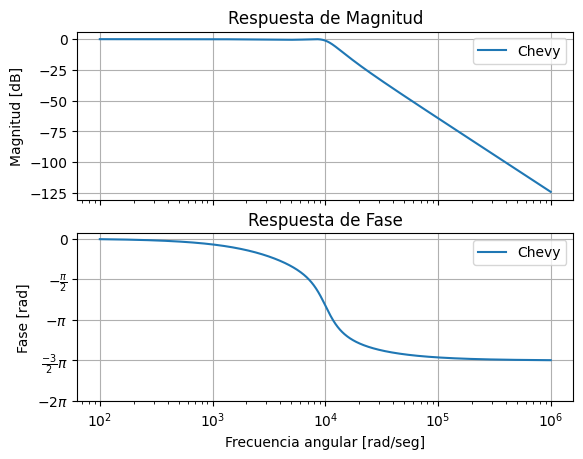

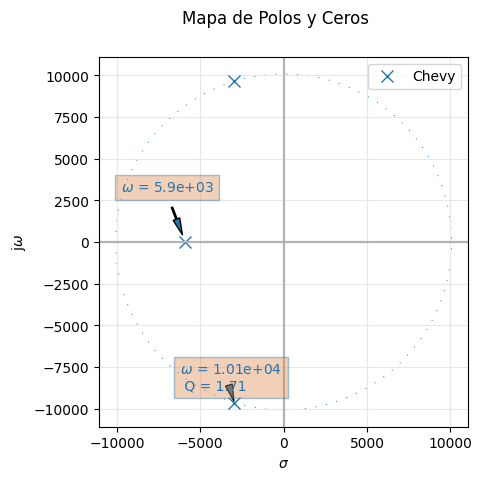

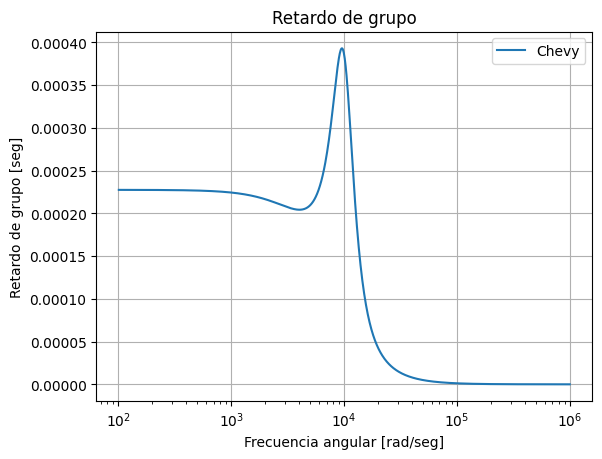

In [3]:
import sympy as sp
import numpy as np
import scipy.signal as sig
import matplotlib.pyplot as plt

from pytc2.sistemas_lineales import tf2sos_analog, pretty_print_SOS, analyze_sys
from IPython.display import display, Math

aprox_name  = 'cheby1'
filter_type = 'lowpass'
fpass       = 1500 # 
ripple      = 0.5  # dB
fstop       = 4500 # Hz
attenuation = 16   # dB

num, den = sig.iirdesign(wp = fpass *2*np.pi,
                         ws = fstop *2*np.pi,
                         gpass = ripple,
                         gstop = attenuation,
                         ftype=aprox_name,
                         output = 'ba',
                         analog=True)


sos_cheb = tf2sos_analog(num, den)
display(Math("T(s) = " + pretty_print_SOS(sos_cheb, mode='omegayq', displaystr=False)))

H1 = sig.TransferFunction(num, den)
analyze_sys(H1, "Chevy")

plt.show()

### Simulacion

<img src="image69.png">

<img src="image70.png">

### Diseño

## Esquematico KICAD

<img src="image71.jpeg">

## PCB KICAD

<img src="image72.jpeg">

### Mediciones

## Imagenes de la medicion realizada en el Laboratorio

<img src="image75.jpeg" weight='100%'>

<img src="image76.jpeg" weight='100%'>


,X (Hz),Ch-1 (dBr),w [rad/s],Ch-1 (deg)
5,184.296177,-0.020704,1157.967029,166.938339
6,208.266583,-0.031522,1308.577532,165.273743
7,235.354689,-0.040619,1478.777126,163.378937
8,265.966000,-0.051331,1671.113661,161.297165
9,300.558757,-0.060916,1888.466367,158.928314
10,339.650807,-0.072169,2134.088963,156.264236
11,383.827349,-0.082138,2411.658360,153.268127
12,433.749694,-0.089824,2725.329705,149.899017
13,490.165168,-0.093012,3079.798584,146.102249
14,553.918298,-0.085987,3480.371312,141.815704


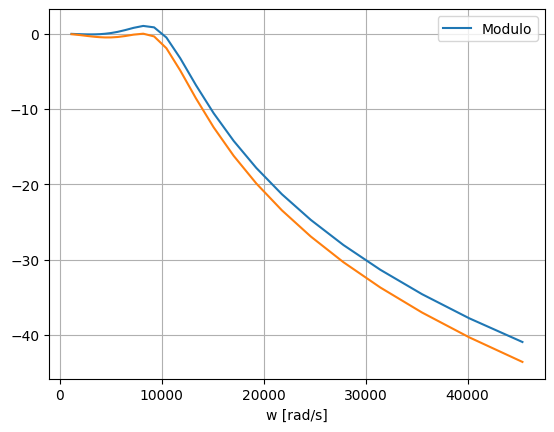

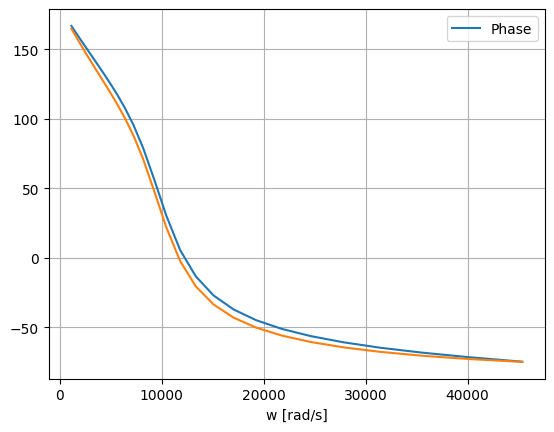

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo .xlsx

df  = pd.read_excel('RELOZMOD.xlsx')
df2 = pd.read_excel('RELOZFASE.xlsx')

df = df.loc[5:35]
df2 = df2.loc[5:35]

df['w [rad/s]']  =  df['X (Hz)'] * 2*np.pi
df2['w [rad/s]'] = df2['X (Hz)'] * 2*np.pi

df.plot(x='w [rad/s]', y='Ch-1 (dBr)', kind='line', label='Modulo')

w, mag, phase = sig.bode(H1, w=df['w [rad/s]'])
plt.plot(w, mag, label="Calculado")
plt.grid()

df2.plot(x='w [rad/s]', y='Ch-1 (deg)', kind='line', label='Phase')

plt.plot(w, phase+180, label="Calculado")
plt.grid()

df['Ch-1 (deg)'] = df2['Ch-1 (deg)']
df

## Esquema de Conexion

<img src="image74.png">

Con el osciloscopio sacamos varias frecuencias de prueba, sus respectiva ganancia y retardos con cruce por cero o diferencia de tiempo entre los picos, y luego graficamos los resultados en escala logaritmica.

# Valores Medidos

<Figure size 640x480 with 0 Axes>

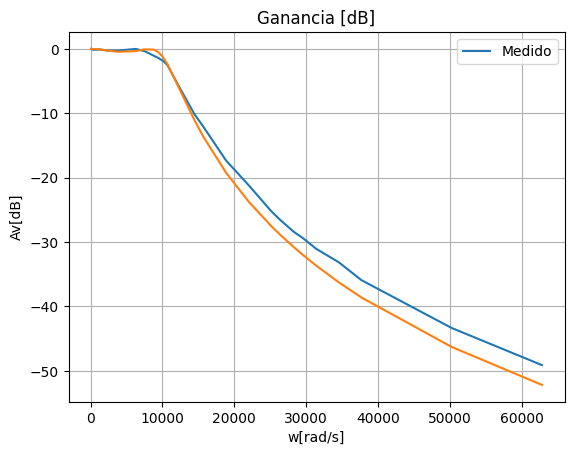

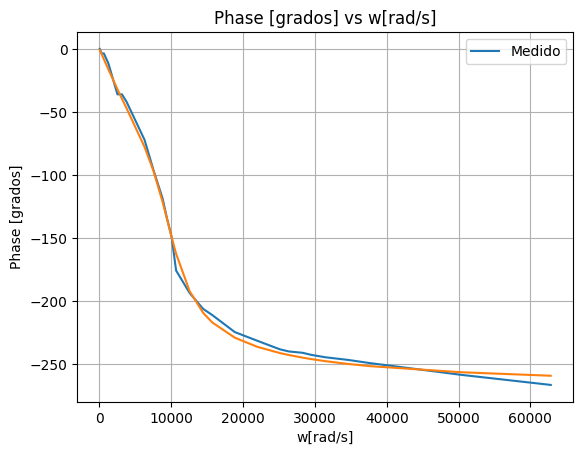

,frecuencia,IN,OUT,Delta T,Ganancia,Av[dB],Desfasaje[grados] - 180,w [rad/s]
0,10,18.7,18.700,0.050000,1.000000,0.000000,0.0000,62.831853
1,50,20.6,20.300,0.009800,0.985437,-0.127424,-3.6000,314.159265
2,100,20.6,20.300,0.004900,0.985437,-0.127424,-3.6000,628.318531
3,200,20.2,20.000,0.002340,0.990099,-0.086427,-11.5200,1256.637061
4,400,20.2,19.600,0.001000,0.970297,-0.261906,-36.0000,2513.274123
5,500,20.2,19.600,0.000800,0.970297,-0.261906,-36.0000,3141.592654
6,600,20.2,19.600,0.000640,0.970297,-0.261906,-41.7600,3769.911184
7,1000,20.0,20.000,0.000300,1.000000,0.000000,-72.0000,6283.185307
8,1200,20.0,19.200,0.000194,0.960000,-0.354575,-96.1920,7539.822369
9,1400,20.0,17.700,0.000122,0.885000,-1.061135,-118.5120,8796.459430


In [5]:
import pandas as pd
import matplotlib.pyplot as plt

npoints = 1000

# Cargar el archivo .xlsx
df = pd.read_excel('medicion.xlsx')

df['Ganancia'] = df['OUT'] / df['IN']
df['Av[dB]'] = 20 * np.log10(df['Ganancia'])
df['Desfasaje[grados] - 180'] = df['Delta T'] * 360 * df['frecuencia'] - 180
df['w [rad/s]'] = df['frecuencia'] * 2*np.pi

plt.figure(1)
df.plot(x='w [rad/s]', y='Av[dB]', kind='line', label='Medido')

# Agregar títulos y etiquetas si es necesario
plt.title('Ganancia [dB]')
plt.xlabel('w[rad/s]')
plt.ylabel('Av[dB]')
plt.grid()


w, mag, phase = sig.bode(H1, w=df['w [rad/s]'])
plt.plot(w, mag, label="Calculado")

plt.figure(2)
df.plot(x='w [rad/s]', y='Desfasaje[grados] - 180', kind='line', label='Medido')

# Agregar títulos y etiquetas si es necesario
plt.title('Phase [grados] vs w[rad/s]')
plt.xlabel('w[rad/s]')
plt.ylabel('Phase [grados]')
plt.grid()

plt.plot(w, phase, label="Calculado")

# Mostrar el gráfico
plt.show()
# Mostrar el DataFrame
df


### Conclusiones y Reflexiones

El diseño y la implementación del filtro pasabajos Chebyshev se realizaron con precisión, logrando una atenuación eficiente de las frecuencias superiores a la frecuencia de corte especificada, mientras se mantiene una respuesta en frecuencia adecuada dentro de la banda de paso. Aunque las atenuaciones medidas no coincidieron exactamente con las esperadas teóricamente, los resultados obtenidos están dentro de un rango aceptable y se aproximan a las especificaciones de diseño. Las pruebas confirmaron que el filtro opera según las características esperadas, con desviaciones menores atribuibles a las tolerancias de los componentes y las variaciones en la construcción.
Se observa que a frecuencias mayores hay mayor desviacion a la curva simulada esperada.